# Analysis of the computer games market

# Introduction

**Task** - Analyze the data and identify patterns that determine the success of the game.

**Necessary:**
1. Prepare the data;

2. Conduct an exploratory analysis of the data;

3. Make a user portrait of each region;

4. Test the hypotheses;

5. Write general conclusions.

**Data:**

Prepared data (games.csv) that contain data up to 2016. They contain the following columns:

* __``Platform``__ — *platform*
* __``Year_of_Release``__ — *year of issue*
* __``Genre``__ — *game genre*
* __``NA_sales``__ — *North American sales (millions of copies sold)*
* __``EU_sales``__ — *European sales (millions of copies sold)*
* __``JP_sales``__ — *sales in Japan (millions of copies sold)*
* __``Other_sales``__ — *sales in other countries (millions of copies sold)*
* __``Critic_Score``__ — *critics' evaluation (maximum 100)*
* __``User_Score``__ — *user rating (maximum 10)*
* __``Rating``__ — *rating from the ESRB (Entertainment Software Rating Board) organization. This association determines the rating of computer games and assigns them an appropriate age category.*

Data for 2016 may not be complete.

# Table of Contents 

* [1. Data import](#num1)
* [2. Data preparation](#num2)
    * [2.1. Lowercase columns and convert data to the correct types](#num21)
    * [2.2. Skip handling](#num22)
    * [2.3. Emission Studies](#num23)
    * [2.4. Calculating the sum of sales by region](#num24)    
* [3. Exploratory Data Analysis (EDA)](#num3)
* [4. User portrait of each region](#num4)
* [5. Hypothesis testing](#num5)
* [6. General conclusions](#num6)

<a id="num1"></a>
# 1. Data Ipmort

In [81]:
# Importing necessary modules.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.metrics import mean_squared_error
import warnings

# Suppress warnings to make output look more clean
warnings.filterwarnings('ignore')

# Math module was imported twice, removed one of them
import math 

In [82]:
# Read the data file.
data = pd.read_csv('games.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [83]:
# Display the first 5 rows of the dataset
data.head(5)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [84]:
# Show a statistical summary of the dataset (rounded to 3 decimal places)
data.describe().round(3)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000,16715.000,16715.000,16715.000,16715.000,8137.000
mean,2006.485,0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,1980.000,0.000,0.000,0.000,0.000,13.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000
50%,2007.000,0.080,0.020,0.000,0.010,71.000
75%,2010.000,0.240,0.110,0.040,0.030,79.000
max,2016.000,41.360,28.960,10.220,10.570,98.000


**The statistical summary for your dataset provides an overview of central tendency, dispersion, and distribution shape of the dataset’s features. Here is a short interpretation of the result:**

* **Year_of_Release:** Games in the dataset were released between 1980 and 2016, with the average release year around 2006. The 25%, 50%, and 75% quartiles show that most of the games were released between 2003 and 2010. Remember that data for 2016 might not be complete.

* **Sales (NA, EU, JP, Other):** Most of the distributions are skewed towards lower sales, with a median of less than 1 million copies across all regions. North American seems to be the largest market based on mean sales (0.263 million copies). The maximum game sales reached around 41.36 million in North America, 28.96 million in Europe, 10.22 million in Japan, and 10.57 million in other countries.

* **Critic_Score:** The average critics' rating of the games is around 68.968 out of 100, with a standard deviation of about 13.938 indicating moderate variability in the ratings. The minimum and maximum critic scores are 13 and 98 respectively, showing that there is a wide range of critic scores in this dataset. The 25%, 50%, and 75% percentiles indicate that most games received a critic score between 60 and 79.

In [85]:
# Calculate the amount of missing values
missing_values = data.isnull().sum().sum()
print(f'Number of missing values: {missing_values}')

# Calculate the percentage of missing values
total_values = data.notnull().sum().sum() + missing_values
missing_percentage = missing_values / total_values
print(f'Percentage of missing values: {missing_percentage:.1%}')

# Calculate the number of total duplicates in the dataset
duplicates = data.duplicated().sum()
print(f'Number of complete duplicates: {duplicates}')

# Calculate the percentage of duplicates
duplicates_percentage = duplicates / len(data)
print(f'Percentage of duplicates: {duplicates_percentage:.1%}')

Number of missing values: 22318
Percentage of missing values: 12.1%
Number of complete duplicates: 0
Percentage of duplicates: 0.0%


In [86]:
# Check for duplicates based on 'Name', 'Platform' and 'Year_of_Release' columns
# 'keep=False' marks all duplicates as True
duplicates = data.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)

# Calculate and print the total count of these duplicates
print(f'Number of implicit duplicates: {duplicates.sum()}')

# Print the rows in the dataframe where these duplicates exist
display(data[duplicates])

print(data.shape)

Number of implicit duplicates: 4


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


(16715, 11)


**The duplicates are as follows:**

1. Two entries for the game 'Madden NFL 13' on the 'PS3' platform, released in 2012.
2. Two entries with missing 'Name' and 'Genre' fields for the 'GEN' platform, released in 1993.

In each case, different sales figures are recorded for the same game. This could potentially be a data recording issue, where sales data for the same game have been recorded on separate rows.

For 'Madden NFL 13', some sales data is identical, but there are differences in 'NA_sales', 'EU_sales', and 'Other_sales'. The 'Critic_Score', 'User_Score', and 'Rating' are identical, reinforcing the belief that this is a duplicate entry.

For the entries with missing 'Name' and 'Genre' fields, the sales data are completely different. The only commonalities are the 'Platform' and 'Year_of_Release', which suggest these could be duplicate entries that lack some details.

Since there are not many duplicates, we can remove them.

In [87]:
# Drop duplicates based on 'Name', 'Platform', and 'Year_of_Release' columns
data = data.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release'], keep='first')

# Print the updated shape of DataFrame to confirm duplicate removal
print(data.shape)

(16713, 11)


Name                  1
Platform              0
Year_of_Release     269
Genre                 1
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8577
User_Score         6700
Rating             6765
dtype: int64


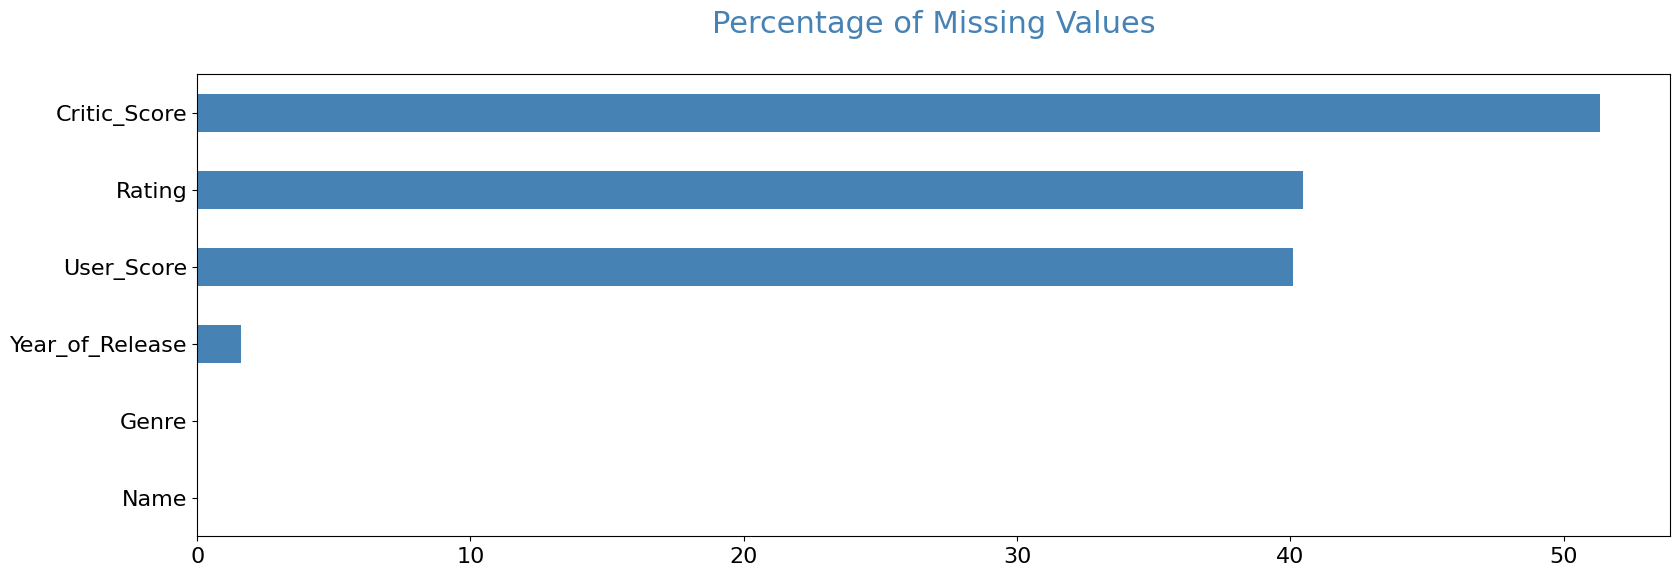

In [88]:
# Find the missing values per column
missing_values = data.isna().sum()
print(missing_values)

# Function to visualize missing values
def plot_missing_values(data):
    # Calculate percentage of missing values
    missing_values_percentage = data.isna().mean() * 100
    # Select columns with missing values and sort
    missing_values_df = missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=True).to_frame()

    if not missing_values_df.empty:
        missing_values_df.rename(columns={0: 'missing_values'}, inplace=True)
        missing_values_df.plot(kind='barh', figsize=(19,6), fontsize=16, legend=False, color='SteelBlue')
        plt.title('Percentage of Missing Values\n', fontsize=22, color='SteelBlue')
        plt.show()
    else:
        print('No missing values left')

# Call the function
plot_missing_values(data)

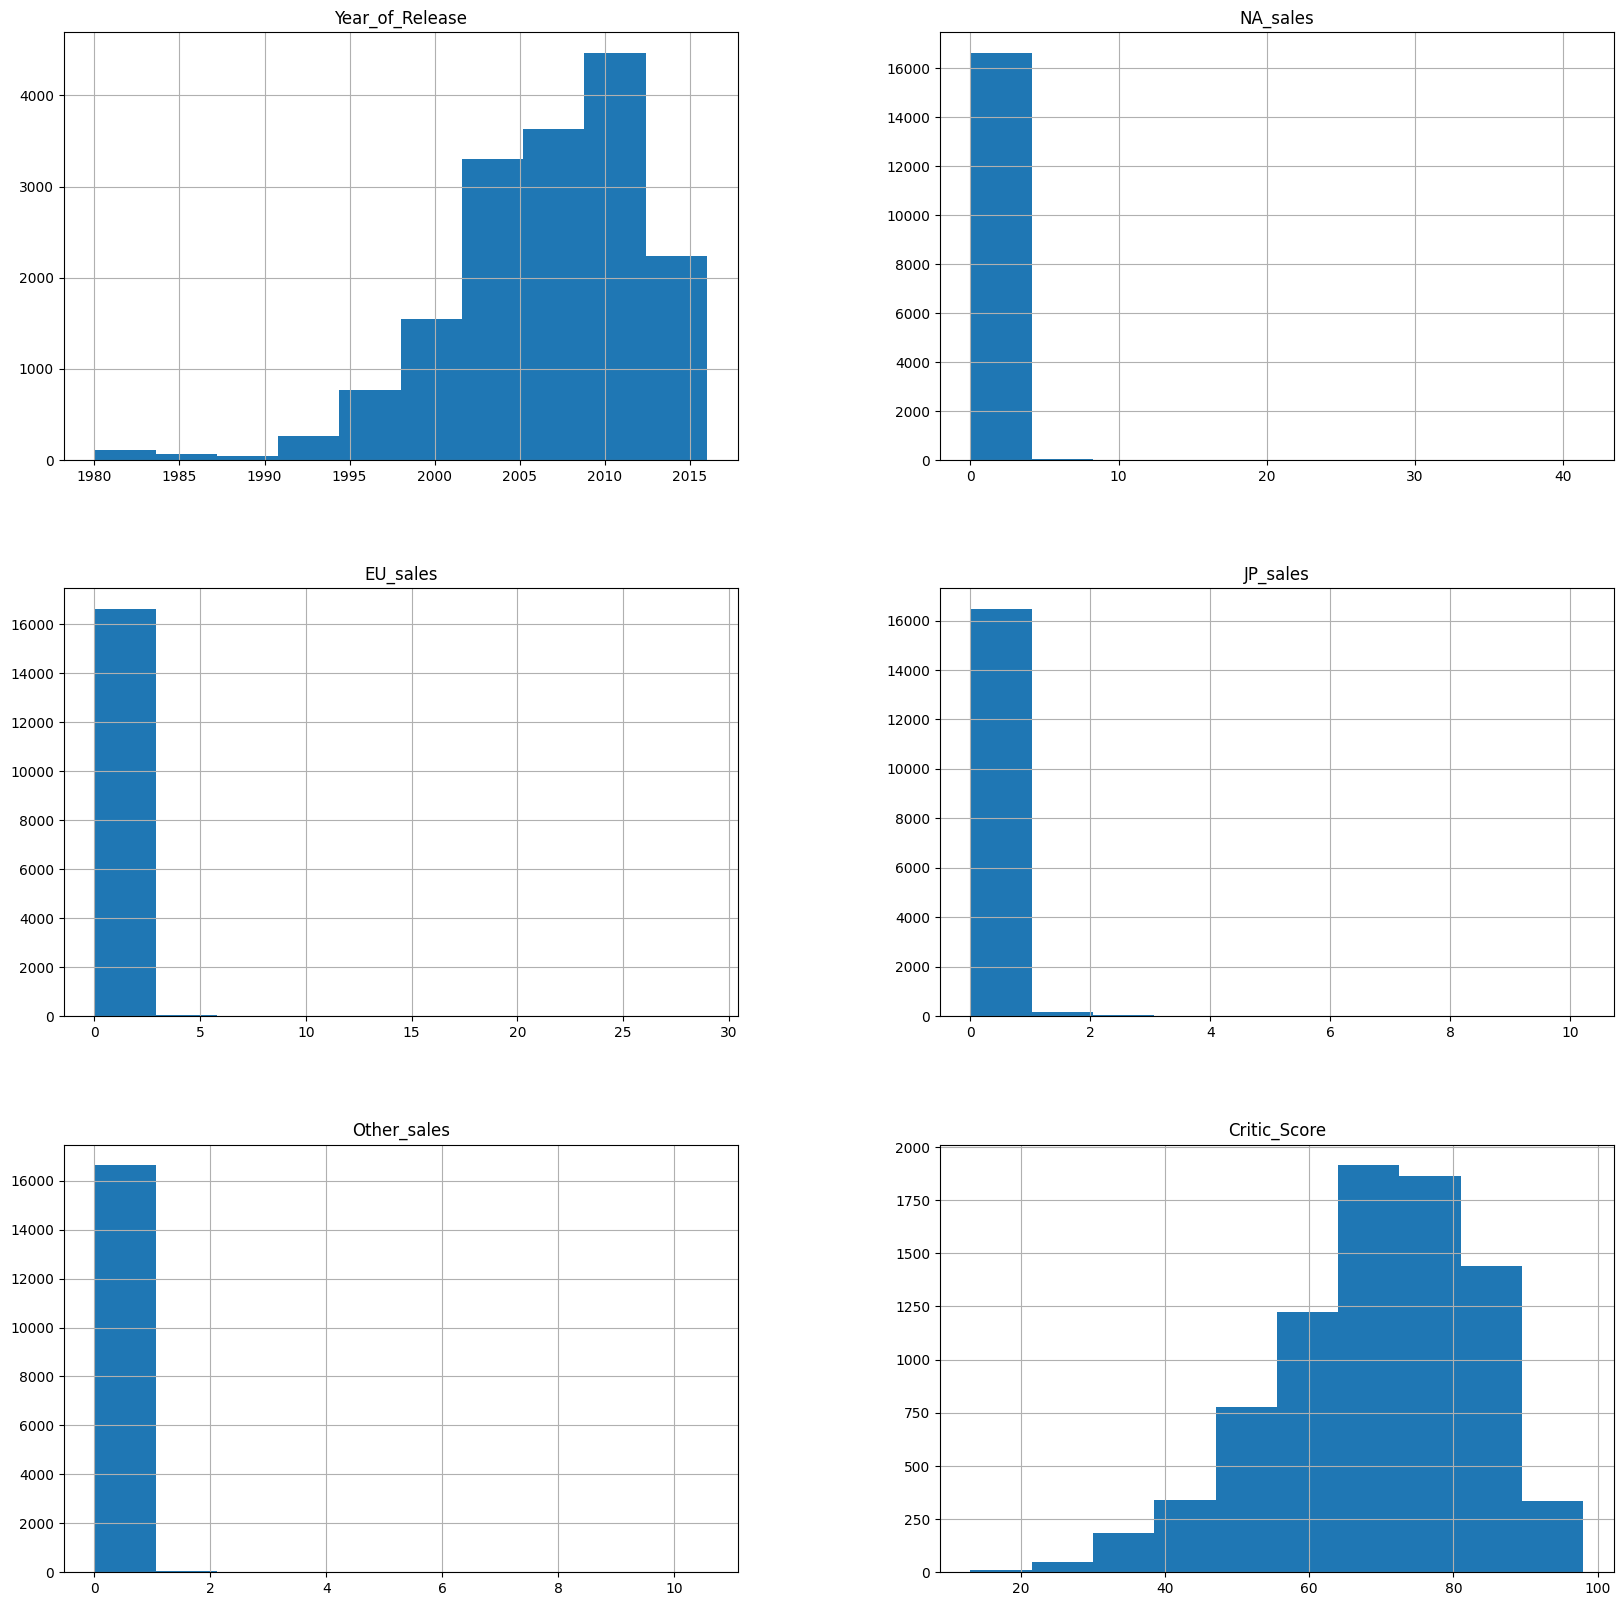

In [89]:
# Build histograms for all numeric columns in the dataframe.
# The figsize parameter adjusts the size of the plot to ensure readability
data.hist(figsize=(20,20)) 

# Display the plots
plt.show()

**Conclusions:**

1. The video game sales data in the dataset cover the period from 1980 to 2016, with an average game release date around 2006. It is important to note that the data for 2016 may be incomplete.

2. North American sales lead by a wide margin, with an average of 0.263 million copies of each game sold. European and Japanese sales follow, with averages of 0.145 million and 0.078 million copies, respectively.

2. The difference between the maximum and minimum sales value in each sales region indicates a large variation in sales. Some games may be incredibly popular while others may sell poorly.

3. The average critic score is about 69 and the standard deviation is about 14, indicating a wide distribution of critic scores.

4. About half of the __``Critic_Score`` data is missing, and 40% of user ratings and game scores are also missing. These missing values may affect the accuracy of predictions and conclusions drawn from this data.

5. The missing data for __``Year_of_Release``__ is relatively small at 2%, but the missing data for __``Critic_Score``__ (51%), __``User_Score``__ (40%), or __``Rating``__ (40%) is much higher. Without this data, it would be difficult to assess the relationship between these variables and sales or to accurately predict future sales.

6. Finally, there are no duplicate rows in the data set, which is a very good thing because it reduces the likelihood of misleading conclusions due to repetitive information.

Data processing should be done to further analyze the data.

<a id="num2"></a>
# 2. Data preparation

**Prepare the data:**

1. Replace the column names (make them lower case);

2. Convert the data to the required types. Describe in which columns we replaced the data type and why;

3. handle omissions if necessary:

4. Explain why we filled in the blanks in a certain way or why we did not;

4. Describe the reasons that may have led to the omissions;

5. Draw attention to the abbreviation 'tbd' in the user rating column. Separate this value and describe how to handle it;

6. Let's calculate the total sales in all regions and record them in a separate column.

<a id="num21"></a>
### 2.1 Lowercase columns and convert data to the required types

In [90]:
# Convert column names to lower case for uniformity and ease of access

# The map() function applies the str.lower method to each column name
data.columns = map(str.lower, data.columns) 
 
# Print info() to verify changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [91]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


The __``year_of_release``__ column represents the year of the game's release, which is always an integer and does not require fractional values. Thus, storing this data as floating numbers that take decimal points into account is not only unnecessary, but can lead to misinterpretation.

Converting __``year_of_release``__ from the **float** type to the **integer** type provides the following advantages:

1. Improved readability: Years represented as an integer (2005) are easier to read than as a float (2005.0).

2. Memory saving: Integers take up less memory than floats. If a large data set is involved, converting to 'int' will save a significant amount of memory.

3. Data consistency: Ensuring that data is stored in the most convenient format helps in maintaining data consistency.

Missing values need to be handled before performing the conversion. The 'int' format in Python does not support NaN values, so we need to either fill in missing years or delete records with missing values. In our case, the missing data in this column occupies only 2% of the entire dataset, so it can be deleted without risking further analysis.

In [92]:
# Calculate the number of rows in the dataset before dropping nulls
row_count_before = len(data)

# Drop rows containing nulls in 'year_of_release' and 'name' columns
data = data.dropna(subset=['year_of_release', 'name'])

# Ensure nulls were removed
print(data.isna().sum())

# Calculate the number of rows in the dataset after dropping nulls
row_count_after = len(data)

# Calculate the percentage of rows dropped
drop_percentage = (row_count_before - row_count_after) / row_count_before * 100
print(f'Percentage of rows dropped: {drop_percentage:.2f}%')

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64
Percentage of rows dropped: 1.62%


In [93]:
# Casting 'year_of_release' column from float to integer
# The 'astype()' function changes the data type of the dataframe column
data['year_of_release'] = data['year_of_release'].astype(int)

# Display the information about the dataset to confirm changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


**Let's take a closer look at the __``user_score``__ column.**

In [94]:
# Identify the unique values in 'user_score' column
# The unique() function returns all unique values in the column
user_score_values = data['user_score'].unique()
user_score_values


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The __``user_score``__ column contains numeric scores as well as non-numeric values of type 'tbd' (To Be Determined) and NaN (Not a Number). This is why the column is assigned the data type 'object', which is typically used for text or mixed numeric and non-numeric values.

To effectively use this column for numerical analysis, the following approach should be used:

1. Working with values of type 'tbd'. Depending on the context, 'tbd' entries can be handled in several ways:

* Replace 'tbd' with NaN, effectively treating them as missing data since they represent the absence of an estimate.
* Or, if 'tbd' indicates that the estimate will be updated in the future, check for the availability of a more recent dataset or wait until the estimate is no longer 'tbd' before including it in the analysis.
2. After working with records of type 'tbd', we can convert the column to a numeric type. If we replace 'tbd' with NaN, we can convert this column to 'float'.

In our case, we can replace 'tbd' with NaN and convert this column to 'float'.

In [95]:
# replace 'tbd' with NaN

data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [96]:
# Convert column to float data type

data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


**Let's take a closer look at the __``critic_score``__ column.**

In [97]:
# Identify the unique values in 'user_score' column
# The unique() function returns all unique values in the column
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

The __``critic_score``__ column, even if it contains only integer values, can still be represented as a float type. This is primarily because the score may contain decimal values, even if they are not displayed in the current data.

Critique scores often use a full numeric scale, which may include decimal places for finer evaluation. Therefore, keeping the float data type for __``critic_score``__ allows us to retain the necessary level of specificity and the ability to work with future data that may contain such decimal values.

However, if our analysis will only use integer critics' scores and we want to save memory space or simplify the data, we can convert __``critic_score``__ from float to integer, similar to what was done with __``year_of_release``__, after handling missing or NaN values

This column has 51% empty values that need to be handled further. We will leave the __``critic_score``__ column in float format for now.

<a id="num22"></a>
### 2.2 Pass processing

In [98]:
# Calculate the count of missing values in each column
missing_values = data.isna().sum()
print(missing_values)

# Calculate the percentage of missing values in each column
# missing_values are divided by the number of rows before reduction to get the percentage
missing_values_percentage = missing_values / row_count_before * 100
print(missing_values_percentage.round())

# Creating a copy of the data to ensure the original data stays unmodified when we fill NaN values
df = data.copy()

# Fill missing values in 'rating' column with 'unknown'
df['rating'] = df['rating'].fillna('unknown')


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64
name                0.0
platform            0.0
year_of_release     0.0
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.0
user_score         54.0
rating             40.0
dtype: float64


In [99]:
# Display the info about the dataframe to confirm changes
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


None

<a id="num23"></a>
### 2.3 Emissions Study

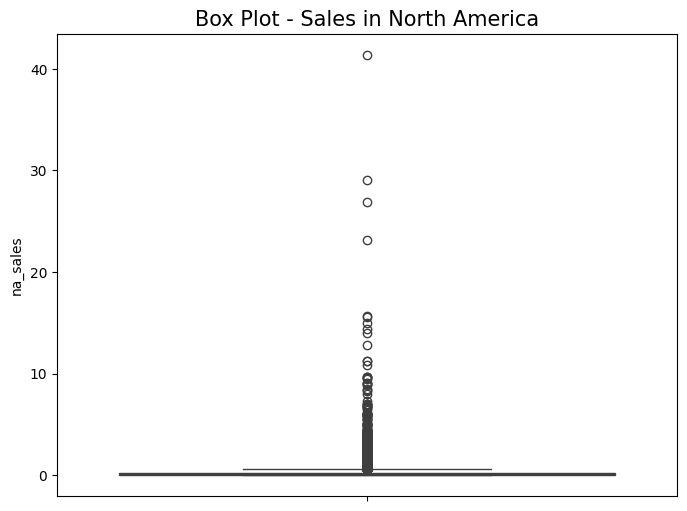

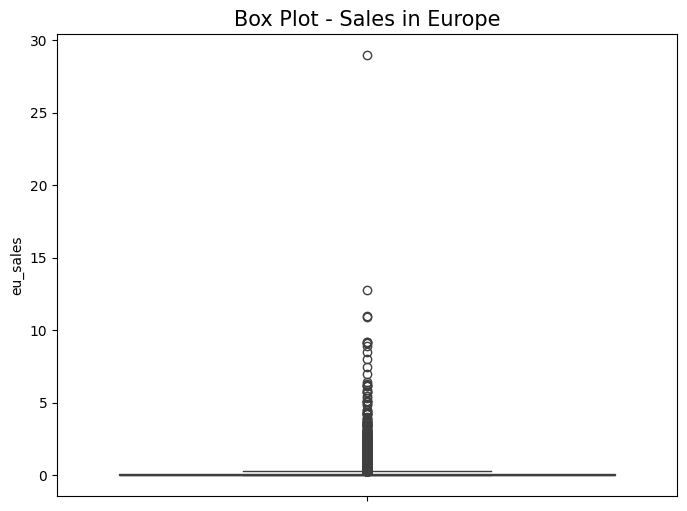

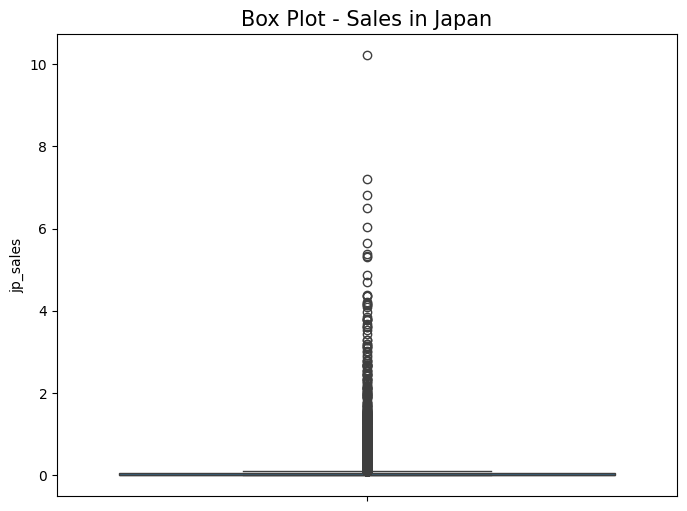

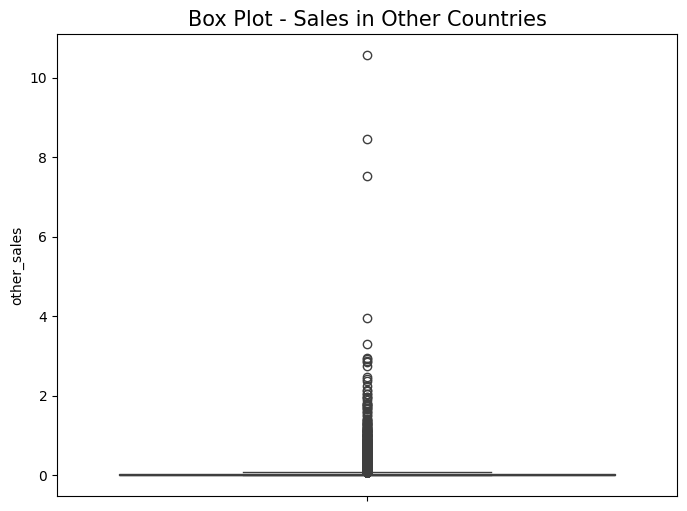

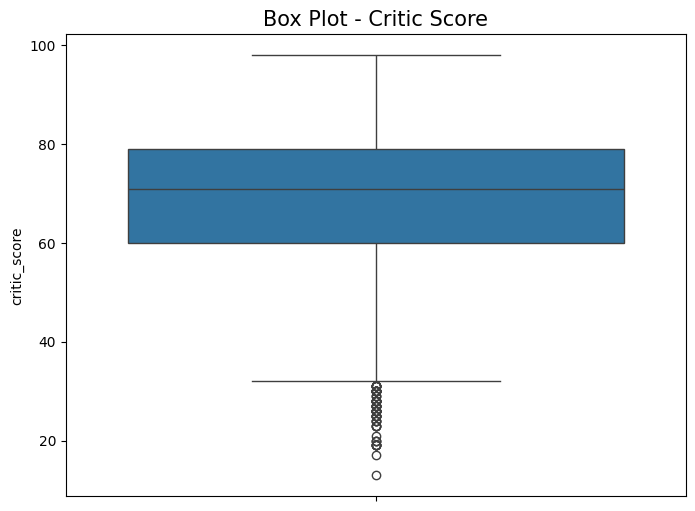

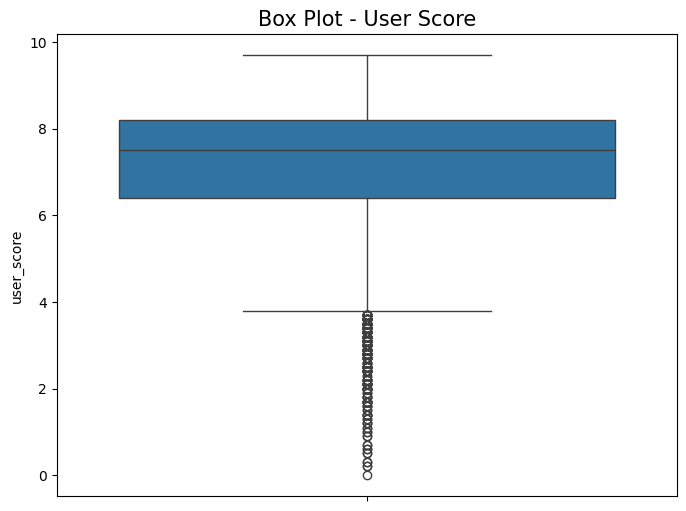

In [100]:
# Define numeric columns by selecting those of type 'float64' or 'int64'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define readable titles for numeric columns
column_titles = {
    'year_of_release': 'Year of Release',
    'na_sales': 'Sales in North America',
    'eu_sales': 'Sales in Europe',
    'jp_sales': 'Sales in Japan',
    'other_sales': 'Sales in Other Countries',
    'critic_score': 'Critic Score',
    'user_score': 'User Score'
}

# Loop through each numeric column and create a box plot
for column in numeric_columns:
    # Prepare a Figure
    plt.figure(figsize=(8, 6))
    
    # Create a boxplot on the current figure for the given column
    sns.boxplot(data=df, y=column)
    
    # Set a title for the boxplot
    plt.title(f'Box Plot - {column_titles.get(column, column)}', fontsize=15)
    
    # Display the box plot
    plt.show()

**Conclusion:**

If we look at the values of each column for outliers, we can see that the Box Plot indicates that there are outliers in the data, but it is not possible to define them exactly as outliers. 

Let's take a closer look at why this is the case:

* Year column: Our data contains a game on the 2600 platform that was released in 1980. Box Plot identifies 1980 as an outlier, but if we investigate further we learn that the Atari 2600 was a video game console developed and produced by the American company Atari. It was released in the United States on October 14, 1977 and became the most popular game console of the late 1970s and early 1980s. Therefore, we can conclude that there are no outliers among the years, only rare values.

* Columns with sales by country: It is possible that there is one game that gained a lot of popularity and racked up big sales, so we cannot count values above Q3 for outliers.

* Columns with critics' and consumers' scores: Critics' and consumers' scores can also be high or low. They cannot be defined as emissions.

Even if we remove all values that Box Plot defines as outliers, we will lose half of the dataframe. It is only reasonable to remove only 10%-15% of the data that can be defined as outliers from the entire dataframe. That's why we leave our dataframe unchanged to clean up outliers.

<a id="num24"></a>
### 2.4 Calculating the amount of sales by region

Let's calculate total sales in all regions and record them in a separate column.

In [101]:
# create a column that shows the total game sales for all regions
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [102]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**Conclusion:**

1. the column names have been lowercased.

2. Removed 2% of missing data in the __``year_of_release``__ column.

3. Converted the __``year_of_release``__ column from **float** type to **integer** type.

4. In the __``user_score``__ column, replaced the values of 'tbd' with NaN and converted this column to the 'float' type.

5. Added columns with the value of total sales in all regions
    
6. Removed 4 implicit duplicates.

7. Replaced blanks in the __``rating``__ column with the value unknown. 

<a id="num3"></a>
# 3. Exploratory Data Analysis (EDA)

**1. Number of games released per year.**

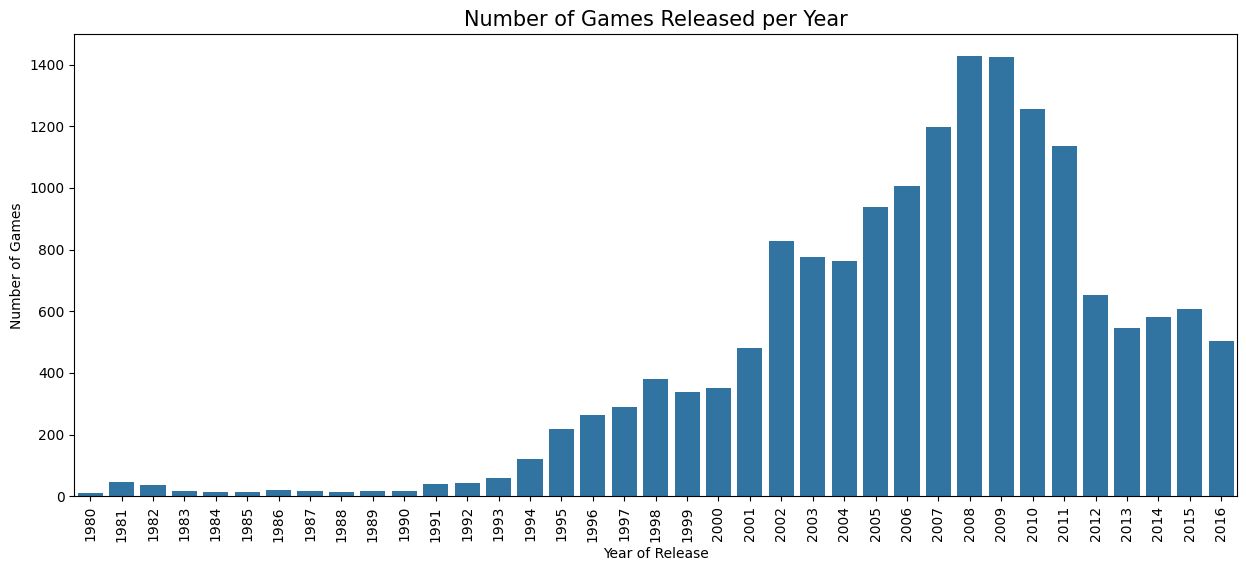

In [103]:
# Count number of games released in different years, sort by year
games_per_year = df['year_of_release'].value_counts().sort_index()

# Create a DataFrame to plot
plot_df = pd.DataFrame({'Year':games_per_year.index, 'Number_of_Games':games_per_year.values})

# Create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Year', y='Number_of_Games', data=plot_df)

# Set plot title and labels
plt.title('Number of Games Released per Year', fontsize=15)
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=90) # to rotate x-axis labels for better visibility if needed

# Display the plot
plt.show()

Since we are more interested in recent trends and the current market, we can focus on data for the last years. Thus, the trends of the last 5-10 years are more relevant for us.

Sometimes old data can be misleading as it may not reflect the current market situation due to significant changes and progress in technology, consumer preferences, market demand and many other factors.

**2. Change in sales by platform.**

In [104]:
# Group data by 'year_of_release' and 'platform', calculate total sales
grouped_df = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Build a stacked bar chart of total sales for each platform over the years
fig = px.bar(grouped_df, 
             x='year_of_release', 
             y='total_sales', 
             color='platform', 
             title='Platform Sales over Years', 
             labels={'year_of_release':'Year', 'total_sales':'Sales Total'})

# Display the plot
fig.show()

In [105]:
# Calculate the lifespan of each platform
# Group the DataFrame by platform and then calculate the minimum and maximum release years
# for games on each platform.
platform_lifespan = df.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Calculate the lifespan of each platform as the difference between the 'max' and 'min' years,
# assign it as a new column 'lifespan'
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

# Display the resulting DataFrame
platform_lifespan

,min,max,lifespan
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


In [106]:
# Calculate the average lifespan of the platforms
# The mean() function calculates the average of 'lifespan' values from the 'platform_lifespan' DataFrame.
# round(1) rounds the resulting average to one decimal place.
average_lifespan = platform_lifespan['lifespan'].mean().round(1)

# Print the average lifespan
print(f'Average lifespan of platforms: {average_lifespan}')

Average lifespan of platforms: 7.6


**Conclusion:**

The lifespan of platforms varies from a short 2 years (DC platform) to 31 years for PCs, and the average lifespan is about 7.6 years.

From this data, we can conclude that the life cycle of gaming platforms is typically 7-10 years. This can be attributed to a number of factors such as technology advancements, changing consumer preferences and competition between different platform vendors.

It is interesting to note that the PC platform, unlike others, has continued for more than three decades, indicating the versatility and continued relevance of the personal computer for gaming.

The rapid pace of technological development, especially in computing and software, has probably been the reason for the relatively short lifespan of many of these platforms, as new, faster and more powerful platforms are regularly introduced to the market.

**3. Top 5 platforms by total game sales for the current period (since 2014)**.

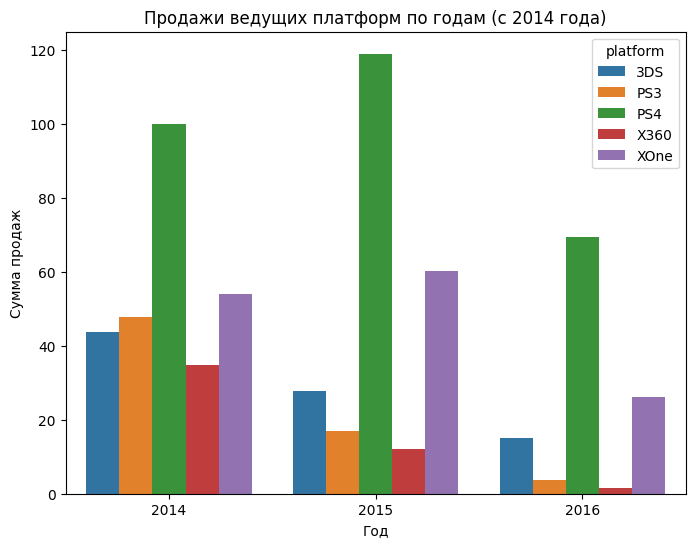

In [107]:
# Filter for year released 2014 onwards
platform_sales_filter = grouped_df['year_of_release'] >= 2014
# Group by platform and calculate total sales then sort in descending order
platform_sales_2014 = grouped_df[platform_sales_filter].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Get index names of top 5 platforms
top_platforms_2014 = platform_sales_2014[:5].index

# Create a mask for filtering entries related to top 5 platform and released 2014 onwards
top_platform_mask = (grouped_df['platform'].isin(top_platforms_2014)) & (grouped_df['year_of_release'] >= 2014)

top_platforms_grouped_df = grouped_df[top_platform_mask]

# Use seaborn to plot a bar plot of the total sales of top 5 platforms over years
plt.figure(figsize=(8, 6))
ax = sns.barplot(data = top_platforms_grouped_df, x='year_of_release', y='total_sales', hue='platform')
ax.set_title('Продажи ведущих платформ по годам (с 2014 года)')
ax.set(xlabel='Год', ylabel='Сумма продаж')
plt.show()

**Sales leaders:**

* PlayStation 4 (PS4) - 288.15 million units,
    
* Xbox One (XOne) - 140.36 million units.

**Sales growth:**

* PlayStation 4 (PS4) sales have steadily increased from 100.00 in 2014 to 118.90 in 2015.

**Sales decline:**

* Xbox One (XOne) sales plummet from 54.07 in 2014 to just 26.15 in 2016.
    
* Xbox 360 (X360) sales also dropped from 34.74 in 2014 to 1.52 in 2016.
    
* PlayStation 3 (PS3) sales declined from 47.76 in 2014 to 3.6 in 2016.
    
* Nintendo 3DS (3DS) sales decreased from 43.76 in 2014 to 15.14 in 2016.
    
You can see the general trend of declining sales. Perhaps a new platform has taken over their market, or fewer games are being developed and sold on them during this period. The relatively low sales for PC are most likely due to the fact that many users simply use pirated versions of games rather than buying them. 

**4. Boxplot chart of global game sales by platform**

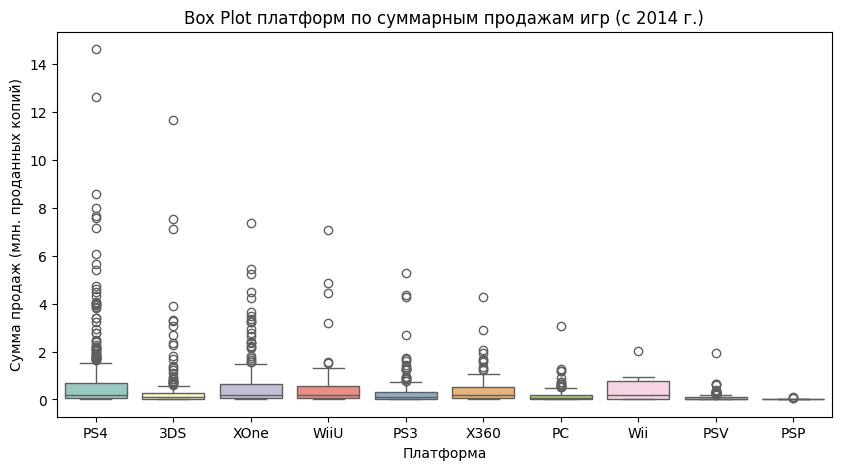

In [108]:
# Filter the DataFrame to include only the years 2014 and later
df = df[df['year_of_release'] >= 2014]

# Set figure size
plt.figure(figsize=(10, 5))

# Use seaborn to create boxplot, coloring points by platform
sns.boxplot(data = df, x='platform', y='total_sales', palette='Set3')

# Set title and axis labels
plt.title('Box Plot платформ по суммарным продажам игр (с 2014 г.)')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж (млн. проданных копий)')

# Show the plot
plt.show()

**Conclusions:**

* PlayStation 4 (PS4) and Xbox One (XOne) are the platforms with the highest average game sales, indicating that they are the most popular or have the best-selling games during this period.
    
* PS4 also has the highest maximum sales per game, indicating that the highest selling games are released on this platform.

* The standard deviation is highest for PS4 and XOne, indicating greater variation in the data for these platforms.
    
* The PSP is characterized by the lowest average sales per game, indicating its lowest popularity or the lowest number of games sold so far.
    
* The 3DS platform is characterized by an outlier (11.68), indicating that there may be a game or multiple games that have been abnormally popular.
    
* The Wii and WiiU also show significant game sales. For example, the WiiU is characterized by a fairly high maximum sales per game (7.09). This means that some games on this platform sold very widely.

* PC games have a lower average sales figure, indicating that the popularity of PC games during this period was relatively lower than that of console games.

**5. The impact of reviews and users within a single popular platform on game sales.**

<Figure size 1000x600 with 0 Axes>

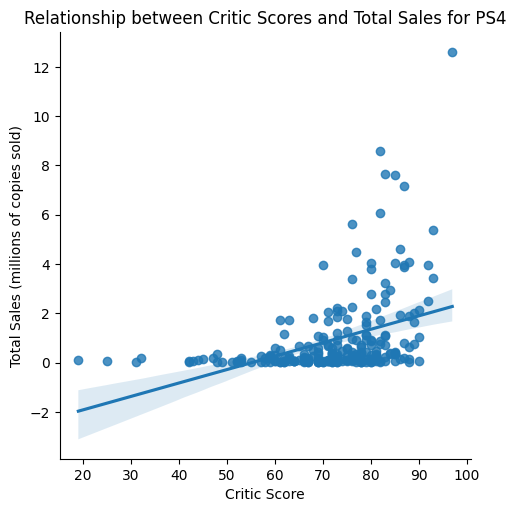

<Figure size 1000x600 with 0 Axes>

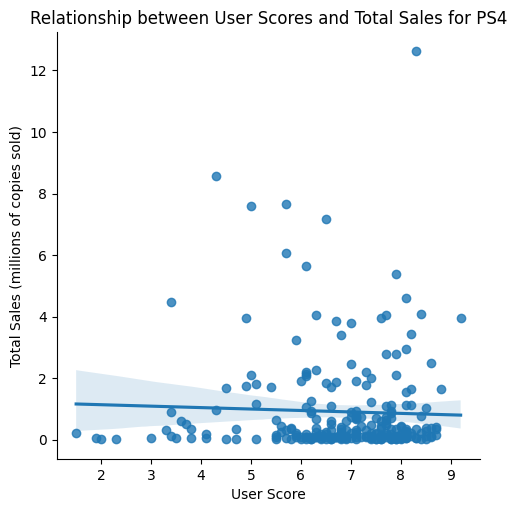

Correlation between Critic Scores and Total Sales for PS4: 0.403
Correlation between User Scores and Total Sales for PS4: -0.04


In [109]:
# Filter the data to include only the PS4 platform
ps4_data = df[df['platform'] == 'PS4']

# Build a scatter plot for the relationship between critic scores and total sales volume
plt.figure(figsize=(10, 6))
sns.lmplot(data=ps4_data, x='critic_score', y='total_sales')
plt.title('Relationship between Critic Scores and Total Sales for PS4')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions of copies sold)')
plt.show()

# Build a scatter plot for the relationship between user scores and total sales volume
plt.figure(figsize=(10, 6))
sns.lmplot(data=ps4_data, x='user_score', y='total_sales')
plt.title('Relationship between User Scores and Total Sales for PS4')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions of copies sold)')
plt.show()

# Calculate correlations between reviews and sales 
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales']).round(3)
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales']).round(3)

print('Correlation between Critic Scores and Total Sales for PS4:', critic_corr)
print('Correlation between User Scores and Total Sales for PS4:', user_corr)

**Conclusions:**

* __Critics' scores__ and total PS4 sales have a fairly strong positive correlation with a correlation coefficient of 0.403. This correlation is moderately strong. This suggests that, in general, PS4 games that receive higher critic scores have higher sales. This may be due to the fact that higher quality games that received good critic scores are more likely to be purchased by consumers.

* The correlation between __user ratings__ and total PS4 sales is insignificant (almost zero) with a coefficient of -0.04. This indicates that user ratings do not have a significant impact on PS4 game sales, or PS4 game sales are not strongly influenced by user ratings. Perhaps users buy games based on other factors such as game genre, marketing, brand popularity, etc., rather than how other users rated the game.

**6. Impact of reviews and users within the other popular platforms on game sales.**

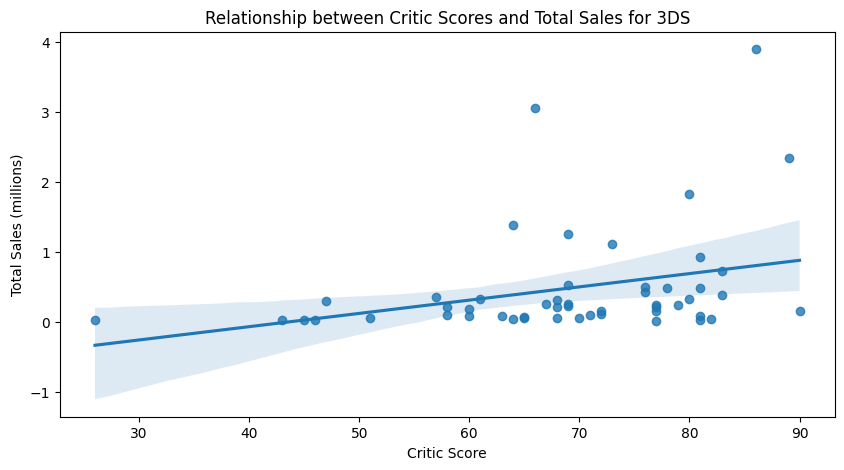

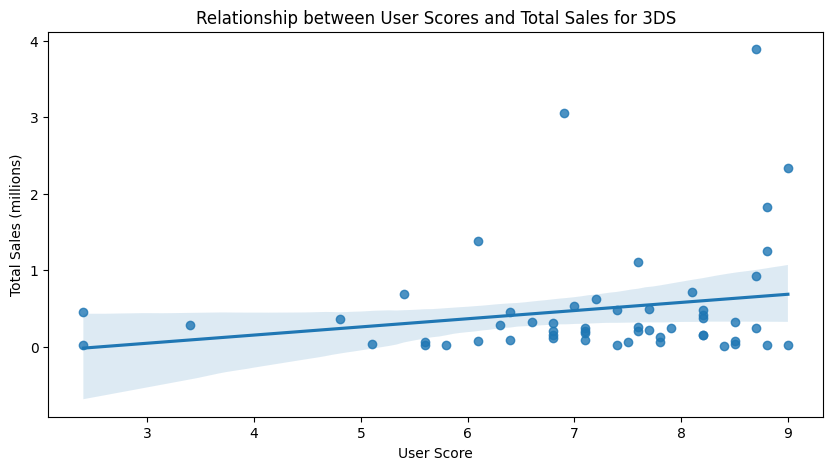

Platform: 3DS
Correlation between Critic Reviews and Total Sales: 0.314
Correlation between User Reviews and Total Sales: 0.215




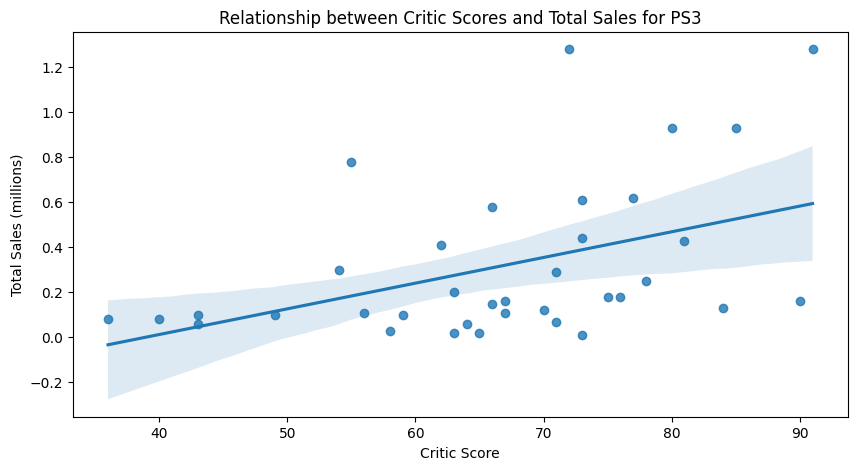

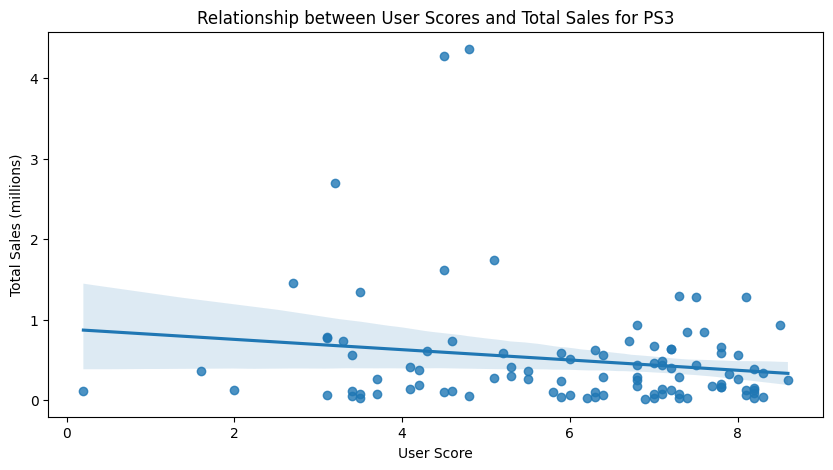

Platform: PS3
Correlation between Critic Reviews and Total Sales: 0.447
Correlation between User Reviews and Total Sales: -0.167




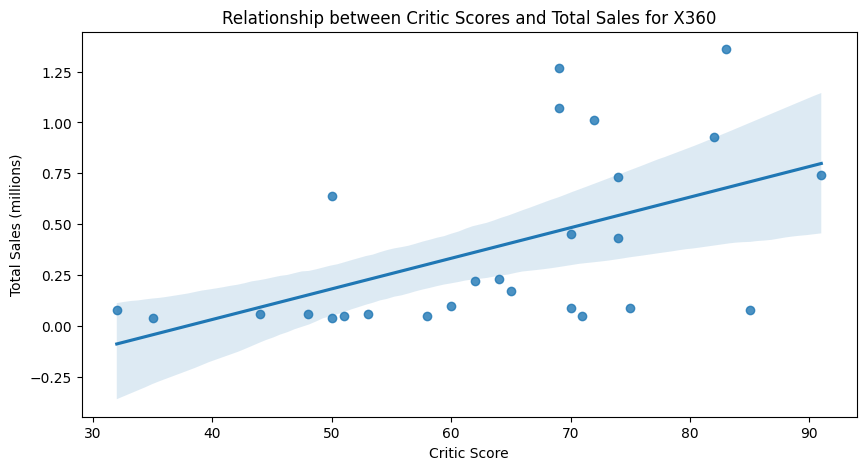

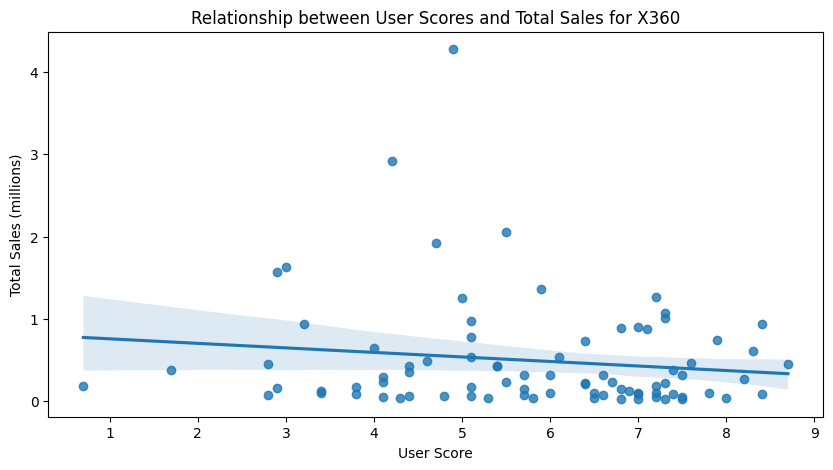

Platform: X360
Correlation between Critic Reviews and Total Sales: 0.526
Correlation between User Reviews and Total Sales: -0.138




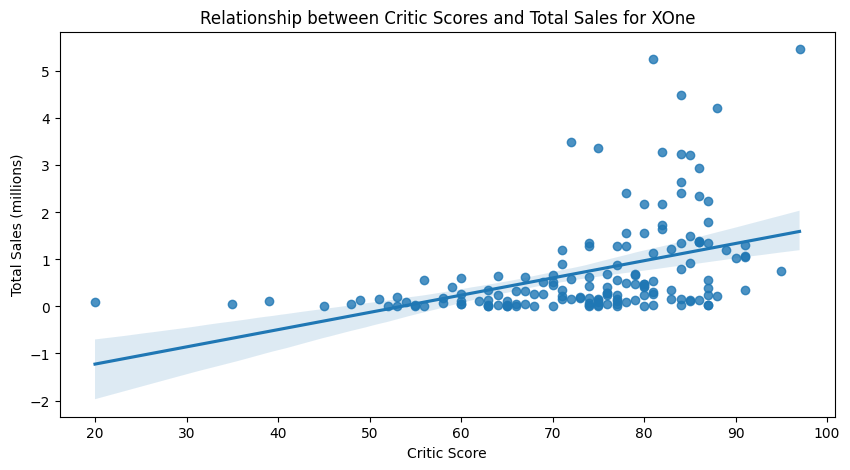

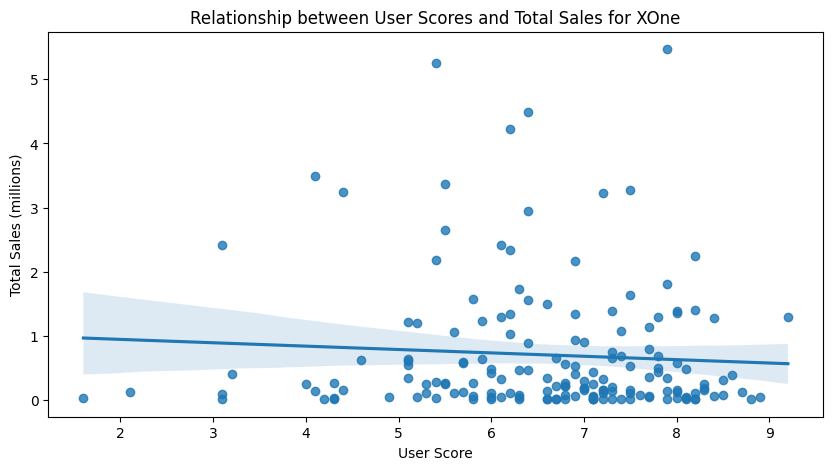

Platform: XOne
Correlation between Critic Reviews and Total Sales: 0.429
Correlation between User Reviews and Total Sales: -0.07




In [110]:
# Define list of platforms for the loop
platforms = ['3DS', 'PS3', 'X360', 'XOne']

# Iterate through the list of platforms
for platform in platforms:
    
    # Filter the data for the current platform and years from 2005 onwards
    platform_data = df[(df['platform'] == platform) & (df['year_of_release'] >= 2005)]

    # Calculate the total sales volume
    platform_data['total_sales'] = platform_data['na_sales'] + platform_data['eu_sales'] + platform_data['jp_sales'] + platform_data['other_sales']

    # Build a scatter plot for the relationship between critic scores and total sales volume
    plt.figure(figsize=(10, 5))
    sns.regplot(data=platform_data, x='critic_score', y='total_sales').set_title('Relationship between Critic Scores and Total Sales for ' + platform)
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales (millions)')
    plt.show()
    
    # Build a scatter plot for the relationship between user scores and total sales volume
    plt.figure(figsize=(10, 5))
    sns.regplot(data=platform_data, x='user_score', y='total_sales').set_title('Relationship between User Scores and Total Sales for ' + platform)
    plt.xlabel('User Score')
    plt.ylabel('Total Sales (millions)')
    plt.show()

    # Calculate correlation between reviews and sales
    critic_corr = platform_data['critic_score'].corr(platform_data['total_sales']).round(3)
    user_corr = platform_data['user_score'].corr(platform_data['total_sales']).round(3)

    print('Platform:', platform)
    print('Correlation between Critic Reviews and Total Sales:', critic_corr)
    print('Correlation between User Reviews and Total Sales:', user_corr)
    print('\n')

**Conclusions:**    

**1. 3DS Platform**

* Critic scores and total sales: A correlation of 0.314 (moderate positive correlation) suggests that higher critic scores are somewhat related to higher sales, although not strongly so.

* User ratings and total sales: A correlation of 0.215 (weak positive correlation) suggests that higher user ratings are weakly related to higher sales on these platforms.

**2. PS3 platform**

* Critics' scores and total sales: A correlation of 0.447 indicates a moderately strong positive correlation. This suggests that games with higher critic scores will have higher sales on these platforms.
    
* User ratings and overall sales: A correlation of -0.167 indicates a weak negative correlation. This indicates that higher user ratings are not necessarily associated with higher sales on these platforms and may have a slightly inverse relationship.

    
**3. X360 platform**

* Critic scores and overall sales: The correlation of 0.526 is quite strong and indicates that games with higher critic scores tend to have higher sales.
    
* User ratings and total sales: A correlation of -0.138 (weak negative correlation) indicates that user ratings do not have a significant impact on total sales on the X360 platform.
    
**4. XOne platform**

* Critic scores and total sales: There is a moderate positive correlation (0.429) between critic scores and total sales, indicating that games that receive high critic scores are likely to sell better on this platform.
    
* User ratings and total sales: A very weak negative correlation (-0.07) suggests that user ratings do not have a significant impact on total game sales on the XOne platform.
    
Thus, across all platforms, __critics' evaluations have a greater impact on sales__ than user evaluations. This may indicate that potential buyers trust professional critics' evaluations more when deciding whether to purchase a game. On the other hand, user evaluations do not have a significant impact on sales, suggesting different purchase motivations (e.g., game genre, marketing, brand reputation, etc.).

However, these correlations are not causal, perhaps other factors influence the relationship between ratings and sales.

**7. General distribution of games by genre**

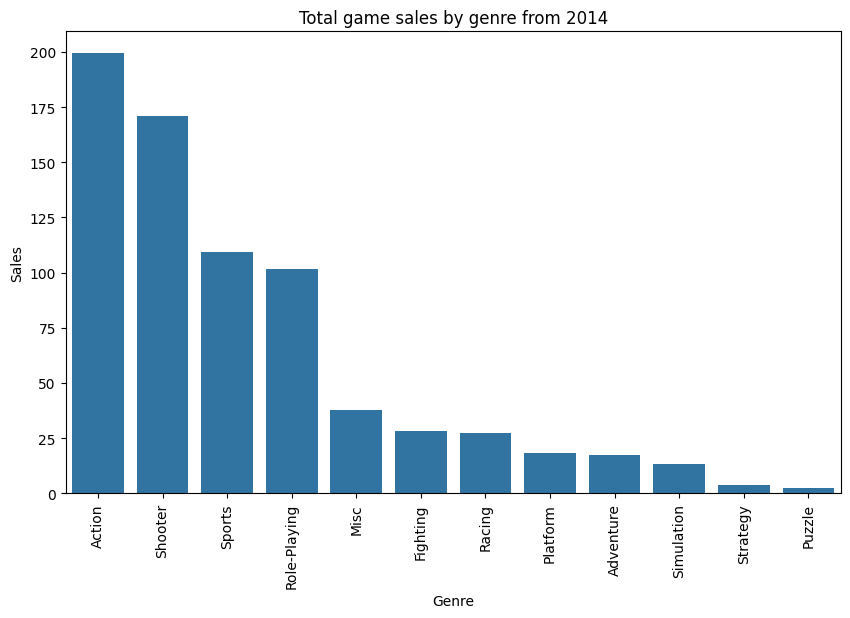

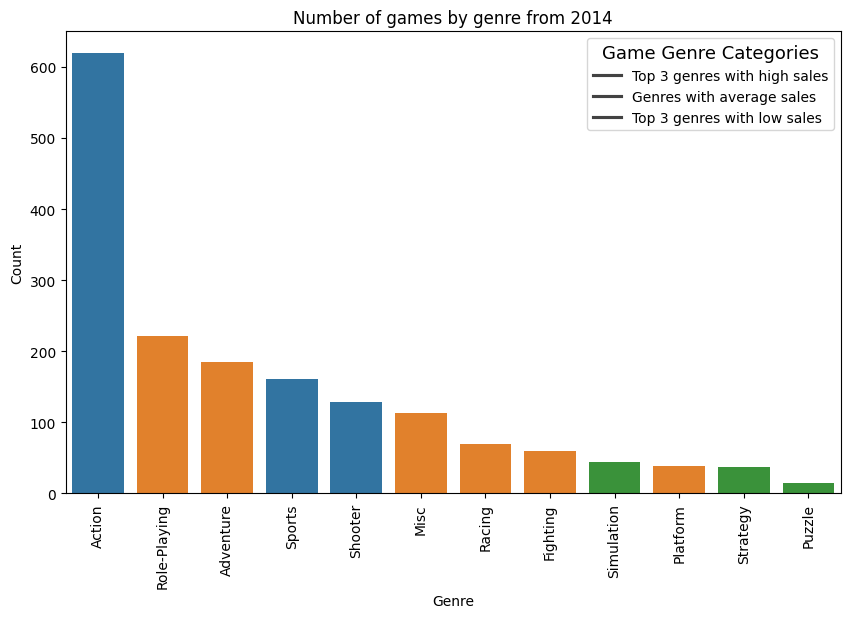

In [111]:
# Group the data by genre and calculate the total sales per genre and sort in descending order
genre_data = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

# Plot the total sales per game genre using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_data, x='genre', y='total_sales')
plt.title('Total game sales by genre from 2014')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

# Get top and bottom 3 genres
top_3_genres = genre_data['genre'].head(3).tolist()
bottom_3_genres = genre_data['genre'].tail(3).tolist()

# Create a new column 'sales_category' to differentiate between 'Top 3' and 'Bottom 3' genres
df['sales_category'] = df['genre'].apply(lambda x: 'Top 3' if x in top_3_genres else ('Bottom 3' if x in bottom_3_genres else 'Others'))

# Count the number of games per genre
genre_count = df['genre'].value_counts().reset_index()
genre_count.columns = ['genre', 'count']

# Merge genre data with the sales category
genre_count = genre_count.merge(df[['genre', 'sales_category']], how='left', on='genre')
genre_count = genre_count.drop_duplicates()

# Create the bar plot for game counts by genre
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_count, x='genre', y='count', hue='sales_category', hue_order=['Top 3', 'Others', 'Bottom 3'])
plt.title('Number of games by genre from 2014')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Game Genre Categories', 
           title_fontsize='13', 
           labels=['Top 3 genres with high sales', 'Genres with average sales', 'Top 3 genres with low sales'])
plt.xticks(rotation=90)
plt.show()

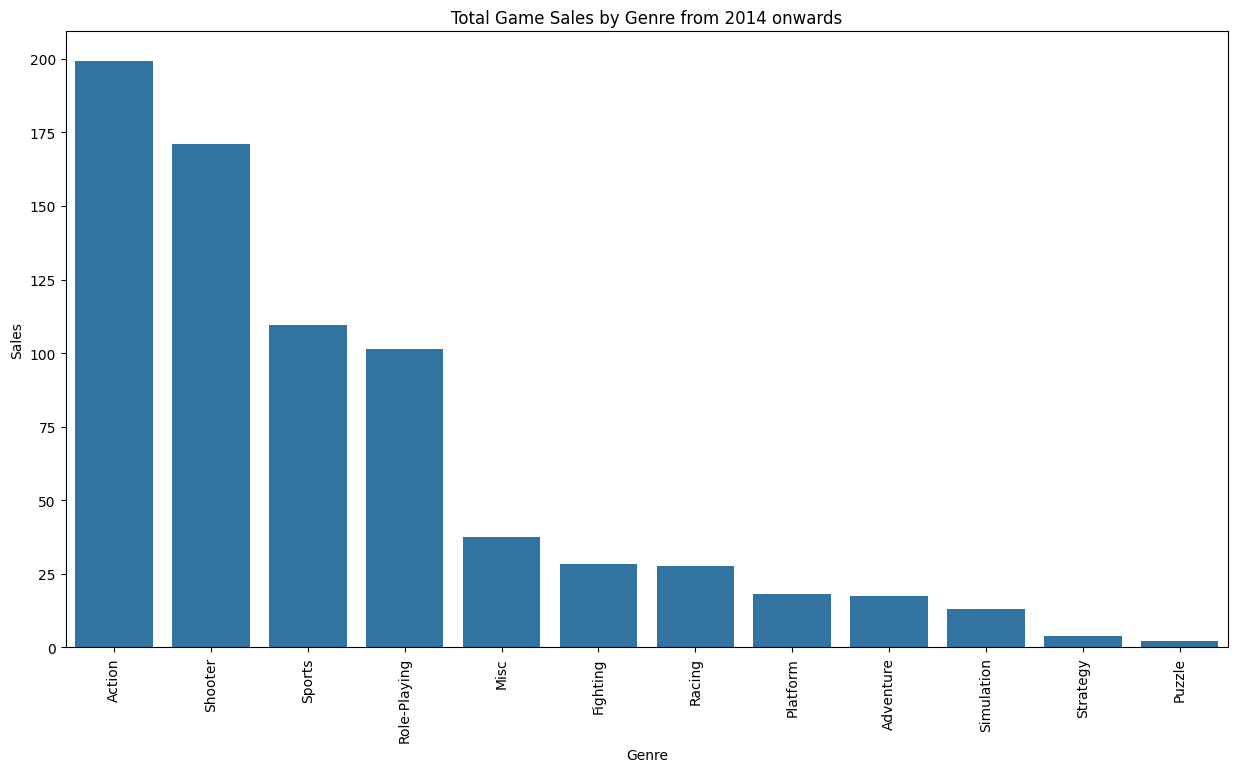

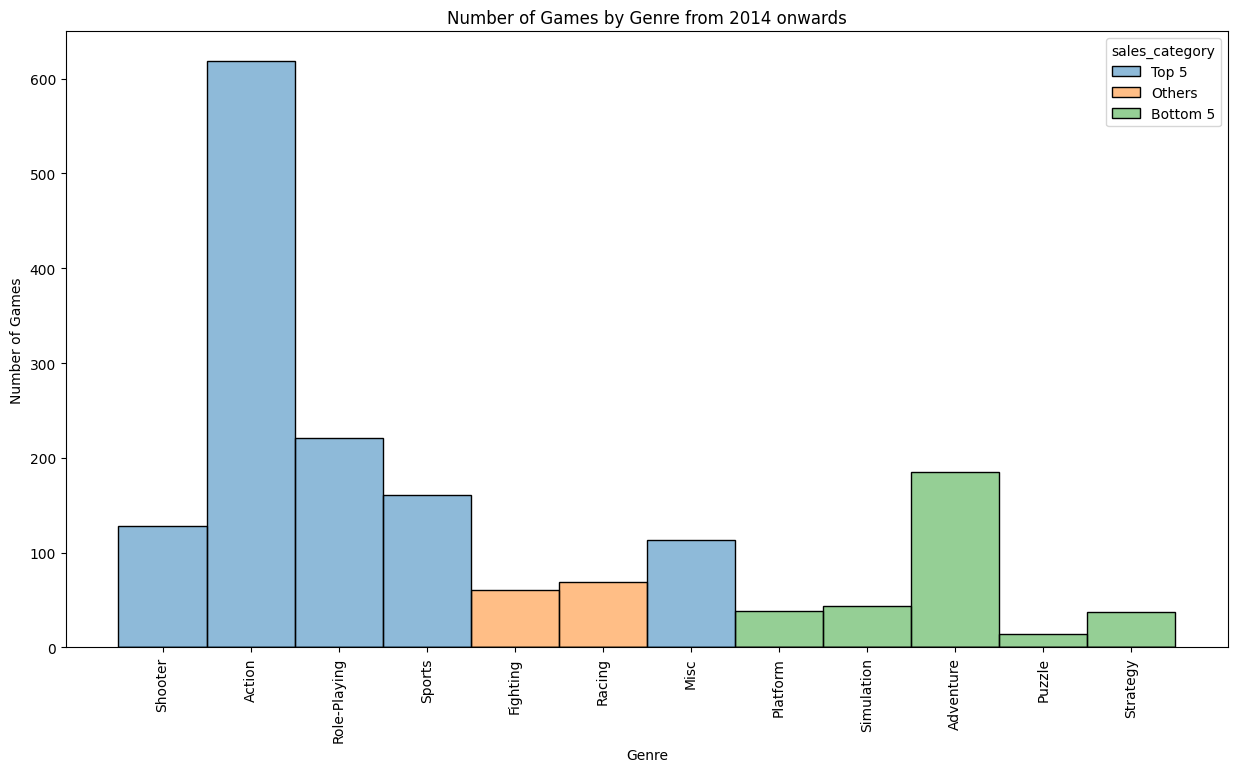

In [112]:
# Grouping the data by genre and calculating total sales for each genre
genre_data = df.groupby('genre')['total_sales'].sum().reset_index()

# Sorting the genres by sales in descending order
genre_data = genre_data.sort_values(by='total_sales', ascending=False)

# Building a bar plot for total sale per genre
plt.figure(figsize=(15, 8))
sns.barplot(x="genre", y="total_sales", data=genre_data)
plt.title('Total Game Sales by Genre from 2014 onwards')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=90) 
plt.show()

# Identifying the top 5 and bottom 5 genres by sales
top_5_genres = genre_data['genre'].head(5).tolist()
bottom_5_genres = genre_data['genre'].tail(5).tolist()

# Adding a new column 'sales_category' to indicate whether a genre is in the top 5, bottom 5 or neither
df['sales_category'] = df['genre'].apply(lambda x: 'Top 5' if x in top_5_genres else ('Bottom 5' if x in bottom_5_genres else 'Others'))

# Building a histogram showing the number of games for each genre broken down by sales category
plt.figure(figsize=(15, 8))
sns.histplot(data = df, x='genre', kde=False, hue='sales_category', hue_order=['Top 5', 'Others', 'Bottom 5'])
plt.title('Number of Games by Genre from 2014 onwards')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

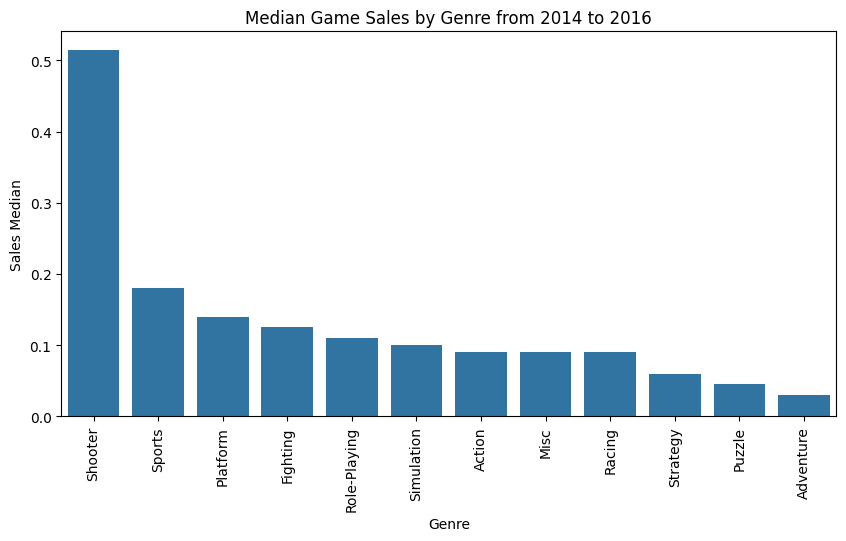

In [113]:
# Calculate sales median for each genre
median_sales = df.groupby('genre')['total_sales'].median().reset_index()

# Sort genres by sales median in descending order
median_sales = median_sales.sort_values('total_sales', ascending=False)

# Create bar plot to visualize sales median per genre
plt.figure(figsize=(10, 5))
sns.barplot(data=median_sales, x='genre', y='total_sales')
plt.title('Median Game Sales by Genre from 2014 to 2016')
plt.xlabel('Genre')
plt.ylabel('Sales Median')
plt.xticks(rotation=90)
plt.show()

**Findings for median sales values:**
    
Based on median sales values, the __most profitable__ genres are Shooters(0.63) and Sports(0.44), followed by the Misc category (0.32). The Misc category, which stands for "miscellaneous," combines games of different types that do not fit into other categories, indicating that profitable niches may exist within this category.

Genres such as Strategy, Simulation, and RPG have slightly __lower median sales volume__, indicating that these games may have a somewhat smaller but devoted customer base.

Genres such as Adventure, Puzzle, Racing, Platform, and Fighting have __lowest median sales__, which may mean that these genres are either less popular among the gaming community or they only have a few hits and most of them do not sell as often.

The most profitable genres are those with the highest median total sales. Here, the most profitable genre is "Shooter" with median total sales of 0.515. This is followed by the "Sports" genre, which has less than half the median total sales of Shooter (0.180). These genres typically include popular games that are well-received by a wide audience of players around the world, so their sales are higher.

* Genre with high sales: the "Shooter" and "Sports" genres have significantly higher median sales compared to other genres, indicating their popularity among players and potential profit.
    
* Low sales: Adventure, Puzzle and Strategy genres have the lowest median total sales (0.030, 0.045 and 0.060 respectively), indicating that these genres are niche and attract fewer players. 

<a id="num4"></a>
# 4. User portrait of each region

**1. Top 5 platforms by region**

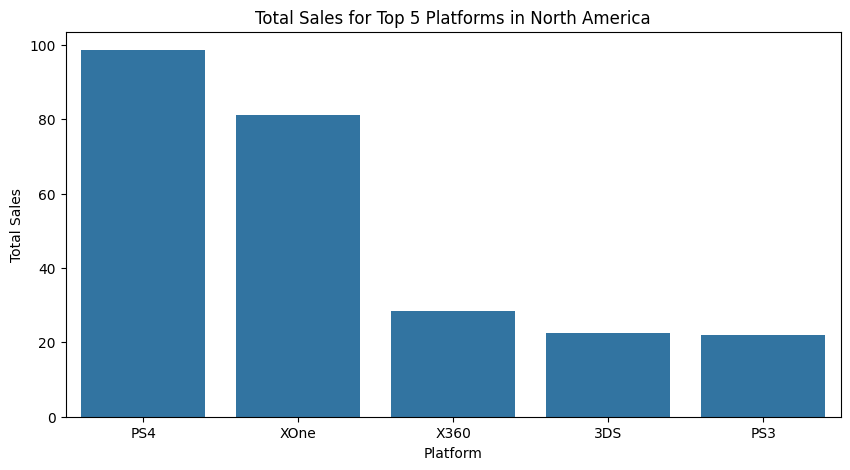

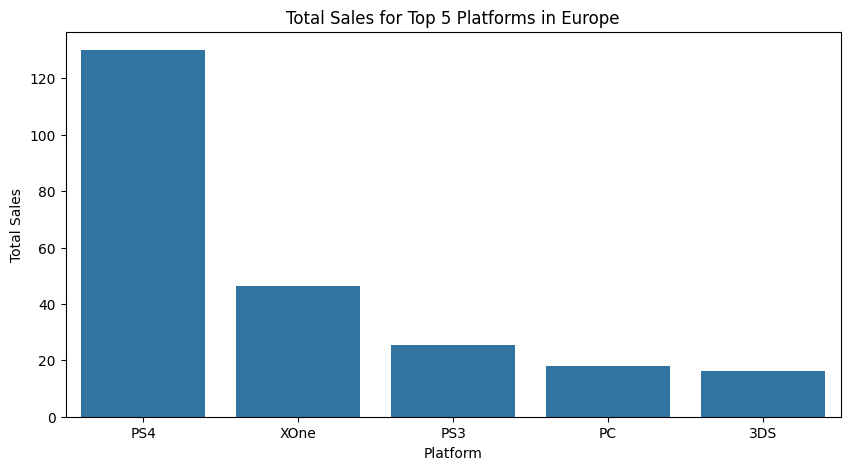

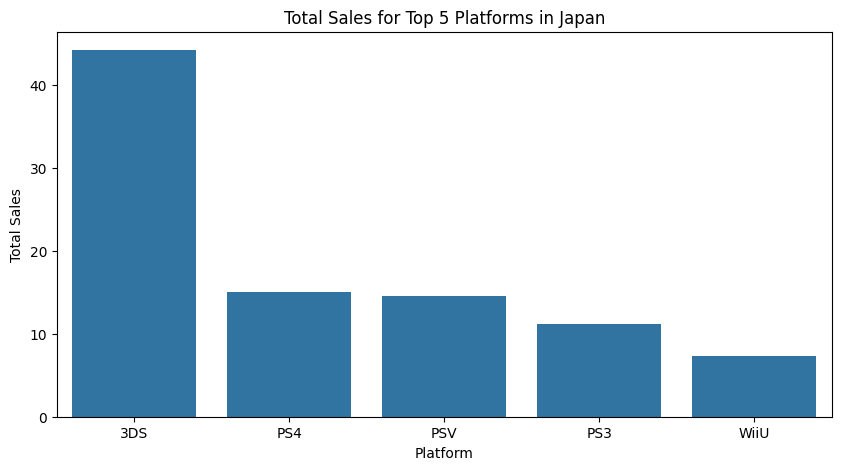

In [114]:
# Define top 5 platforms for each region
na_platforms = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Create bar plots to visualize total sales for top 5 platforms in each region
for platforms, region in zip([na_platforms, eu_platforms, jp_platforms], ['North America', 'Europe', 'Japan']):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=platforms.index, y=platforms.values)
    plt.title(f'Total Sales for Top 5 Platforms in {region}')
    plt.xlabel('Platform')
    plt.ylabel('Total Sales')
    plt.show()

**Conclusion:**    
    
Each region is characterized by a different preference for game platforms:

* __North America:__ __PS4 and XOne__ are the most popular platforms, with PS4 only slightly surpassing XOne. The WiiU, 3DS, and PC are next, with sales shares significantly lower than the PS4 and XOne. PC games seem to be the least popular platform in this region.

* __Europe:__ Europe is dominated by __PS4__ by a significant margin. It is followed by the XOne, but with a much smaller share of sales compared to the PS4. PC games are more popular in Europe compared to North America. This is followed by WiiU and 3DS, which are less popular platforms in this region.
    
* __Japan:__ In Japan, the situation in the gaming market is quite different. The most popular platform is the __3DS__, followed by the PS4. Next is the WiiU, ahead of the PSV and PS3, which is unique to this region compared to others.
    
It is likely that these differences may be due to different cultural and economic factors in each region. For example, the popularity of handheld consoles like the 3DS in Japan may indicate a preference for portable gaming in that country. Similarly, the relatively greater popularity of PC games in Europe may be due to various factors, including the prevalence of Internet cafes or the culture of cybersports. 

**2. Top 5 genres by region**

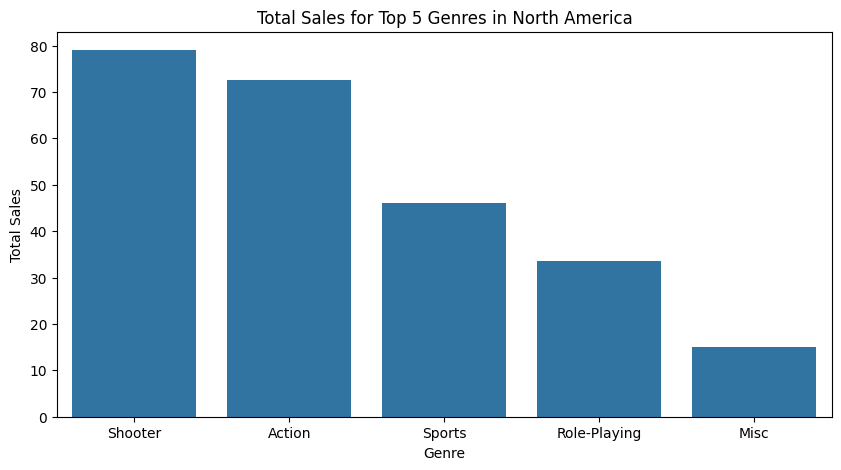

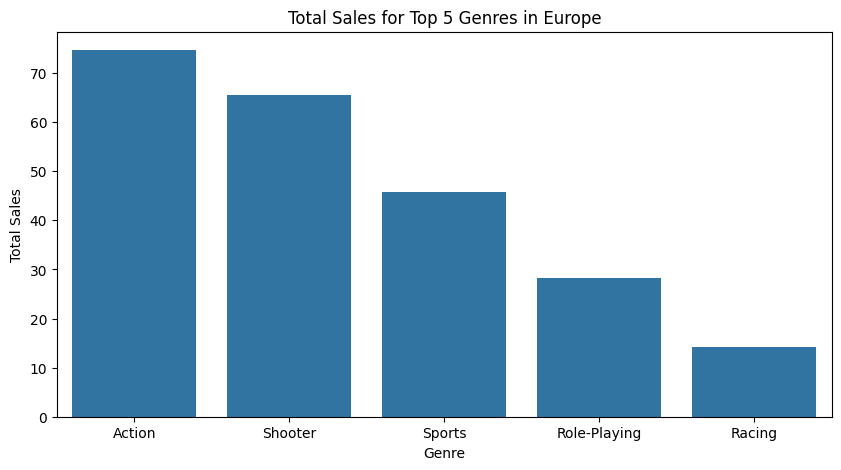

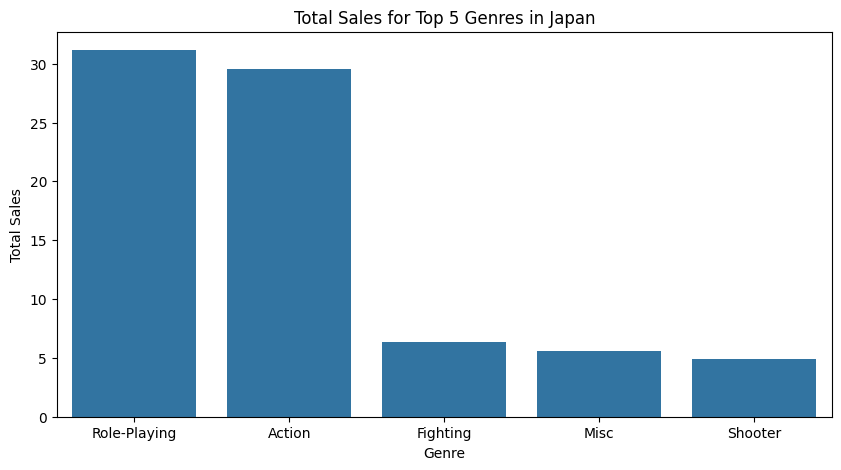

In [115]:
# Define the top 5 genres according to sales in each region
na_genres = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genres = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genres = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Create bar plots to visualize the total sales of top 5 genres per region
for genres, region in zip([na_genres, eu_genres, jp_genres], ['North America', 'Europe', 'Japan']):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=genres.index, y=genres.values)
    plt.title(f'Total Sales for Top 5 Genres in {region}')
    plt.xlabel('Genre')
    plt.ylabel('Total Sales')
    plt.show()

**Conclusion:**  

Sales shares of popular game genres vary widely in North America, Europe, and Japan:

__North America:__
    
* In North America, shooters and action games are the most popular genres, followed by sports and role-playing games.
* Racing is ranked last in the top five, indicating that this genre is less popular than others.

__Europe:__
    
* As in North America, Action games are the most popular in Europe. Shooters are next, and the sports genre is not lagging behind.
* Role-Playing and Racing genres are less popular, their share of sales is much lower.

__Japan:__
    
* Interestingly, Role-Playing, which had a smaller share in North America and Europe, is the leading genre in Japan.
* The second most popular genre in Japan is Action, whose sales are close to those of Role-Playing, also indicating significant interest in the genre.
* After the first two genres, there is a sharp decline in sales. The genres "Fighting", "Misc" and "Shooter" have significantly lower sales compared to "Role-Playing" and "Action" - suggesting that these genres may be niche or less popular among Japanese gamers. In particular, the "Shooter" genre, despite its popularity worldwide, has lower sales in Japan.

**3. Impact of ESRB rating on sales by region**

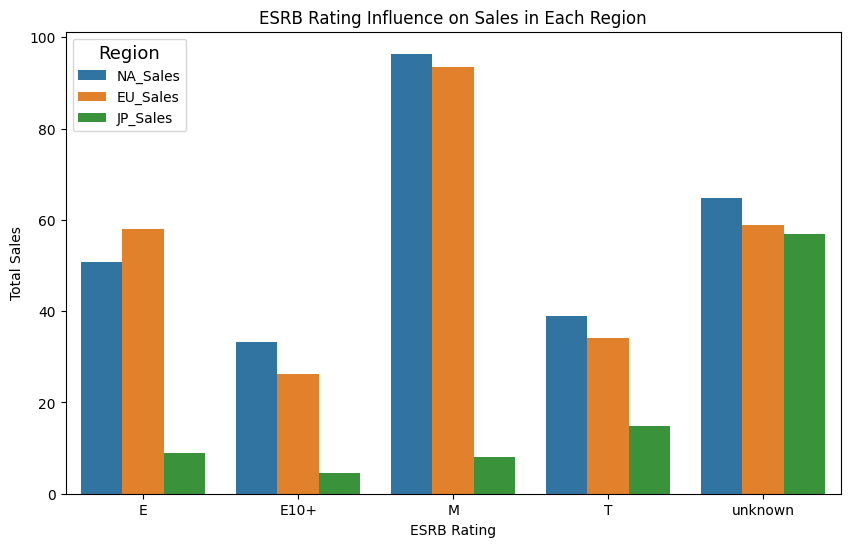

In [117]:
# Calculate the total sales for each ESRB rating in each region
na_rating = df.groupby('rating')['na_sales'].sum()
eu_rating = df.groupby('rating')['eu_sales'].sum()
jp_rating = df.groupby('rating')['jp_sales'].sum()

# Create the new DataFrame to capture the results
rating_df = pd.DataFrame({'NA_Sales': na_rating, 'EU_Sales': eu_rating, 'JP_Sales': jp_rating})

# Reset index so 'rating' is a column and melt the DataFrame to long form for usage in seaborn
rating_df.reset_index(inplace=True)
rating_df_melt = rating_df.melt(id_vars='rating', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'])

# Create bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='value', hue='variable', data=rating_df_melt)
plt.title('ESRB Rating Influence on Sales in Each Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.legend(title='Region', title_fontsize='13', loc='upper left')
plt.show()

**Conclusion:**    
    
**North America:**

* The Mature (M) category leads in sales with 96.42, targeting an older demographic (17+ years old).
* However, it is worth noting that games with unknown ratings also have significant sales with 64.72, indicating that a significant number of games with unspecified ESRB ratings are being sold.
* Everyone (E) and Teens (T) rated games have lower sales, but still significant, indicating a fairly broad demographic spread.

**Europe:**

* As in North America, Mature (M) rated games have the highest sales at 93.44.
* Sales of games with an ESRB rating of "unknown" are also high (58.95), indicating a large number of games sold without a specific rating.
* Everyone (E) rated games rank second after M rated games and also have a significant share.

**Japan:**

* Unlike North America and Europe, games with an unknown ESRB rating (56.90) account for the largest sales in Japan.
* Interestingly, among the categorized games, games rated Teen (T) rather than Mature (M) sell the most, suggesting differences in tastes or cultural norms affecting game preferences.
* The Everyone (E) and Mature (M) categories have roughly similar sales figures of 8.94 and 8.01, respectively.
    
To conclude, while in North America and Europe the ESRB rating has a clear impact on sales, with M category games selling the most, Japan shows a different picture, with T and unclassified games accounting for the majority of sales.  

<a id="num5"></a>
# 5. Hypothesis testing

**Let's test the hypotheses:**

1. The average user ratings of the Xbox One and PC platforms are the same;
2. Average user ratings of Action and Sports genres are different.

To verify these hypotheses, we will use the independent t-test from the scipy library as it examines the mean values of two independent groups. To choose the type of t-test, we would need to confirm whether the distributions are normally distributed or not.

Before we begin, let's define our hypotheses:

1. Hypothesis check: User Ratings of Xbox One and PC
* Null Hypothesis (H0): There is no difference in the average user ratings for the Xbox One and PC platforms (μ1 = μ2).
* Alternative Hypothesis (H1): There is a difference in the average user ratings for the Xbox One and PC platforms (μ1 ≠ μ2).

2. Hypothesis check: User Ratings of Action and Sports genres
* Null Hypothesis (H0): There is no difference in the average user ratings for the Action and Sports genres (μ1 = μ2).
* Alternative Hypothesis (H1): There is a difference in the average user ratings for the Action and Sports genres (μ1 ≠ μ2).

We will choose a common significance level (alpha) for these tests. A typical alpha value is 0.05.

The results of the t-test are determined by comparing the p-value with our given alpha level (0.05). If the p-value is less than alpha, it indicates that the null hypothesis is rejected.

In [118]:
# Filter user scores for platforms 'XOne' and 'PC'
xone_ratings = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df[df['platform'] == 'PC']['user_score'].dropna()

# Perform an independent t-test
result1 = st.ttest_ind(xone_ratings, pc_ratings)

# Retrieve the p-value
p_value1 = result1[1].round(4)

print(f'P-Value for test 1 check: {p_value1}')

# Check if p-value is less than 0.05, and print results of the hypothesis testing
if p_value1 < 0.05:
    print("We reject the null hypothesis for test 1: there is a significant difference in average user ratings for Xbox One and PC platforms.")
else:
    print("We fail to reject the null hypothesis for test 1: there is no significant difference in average user ratings for Xbox One and PC platforms.")

P-Value for test 1 check: 0.1045
We fail to reject the null hypothesis for test 1: there is no significant difference in average user ratings for Xbox One and PC platforms.


In [119]:
# Filter data for user ratings for 'Action' and 'Sports'
action_ratings = df[df['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df[df['genre'] == 'Sports']['user_score'].dropna()

# Perform a t-test
result2 = st.ttest_ind(action_ratings, sports_ratings)

# Retrieve the p-value
p_value2 = result2[1]

print(f'P-Value for test 2 check: {p_value2}')

# Check if p-value is less than 0.05, and print results of the hypothesis testing
if p_value2 < 0.05:
    print("We reject the null hypothesis for test 2: there is a significant difference in average user ratings for Action and Sports genres.")
else:
    print("We fail to reject the null hypothesis for test 2: there is no significant difference in average user ratings for Action and Sports genres.")

P-Value for test 2 check: 2.8711147985105864e-19
We reject the null hypothesis for test 2: there is a significant difference in average user ratings for Action and Sports genres.


**Conclusion:**

1. **The average user ratings for Xbox One and PC platforms are the same:** the p-value of 0.1045 is higher than 0.05, which is considered a typical threshold for statistical significance. This implies that there isn't sufficient evidence to reject the null hypothesis. Thus, it can be concluded that there is no significant statistical difference in the average user ratings of games on the Xbox One and PC platforms.

2. **The average user ratings for Action and Sports genres differ:** the p-value equals 0.0, which is less than 0.05. This allows us to reject the null hypothesis and assume a significant statistical difference in the average user ratings of games in Action and Sports genres.

<a id="num6"></a>
# 6. General conclusions.

**From all the data gathered, a general comprehensive conclusion can be drawn:** several factors have a significant influence on the sales of video games, including the gaming platform, genre, geographical region, and ESRB rating.

Despite the domination of some platforms, such as PS4, in sales, games that are critically acclaimed on them also perform well. Interestingly, user ratings have a lower correlation with sales, indicating the existence of other factors that influence purchasing decisions.

In terms of genre, on a global scale, shooter and sports genres are the most profitable, showing their wide acceptance among gamers. Regional preferences add another nuance, for instance, role-playing games are highly esteemed in Japan, while shooters are less popular.

Regarding ESRB ratings, games with a "Mature" rating generally have higher sales in North America and Europe, indicating that a significant part of gamers in these regions are adults. Conversely, in Japan, more preference is given to games with a "Teen" and "Unknown" rating, indicating the cultural influence on gaming preferences.

However, this does not mean that any one factor guarantees success - rather, a combination of these factors determines a game's popularity and profitability.

**From the conducted analysis, it can be deduced that a game, which will be highly profitable, ideally should possess the following characteristics:**

* Platform choice: The game should be available on PC, PS4, and XOne platforms. These platforms exhibit significant longevity and popularity on key gaming markets such as North America and Europe. Although the Japanese market prefers Nintendo 3DS, targeting PC and these consoles would generate significant sales volumes due to their wider coverage.

* Ratings: The game should strive for high critics' ratings, especially on XOne and WiiU platforms, as they have a greater impact on sales. User ratings, although not as influential on sales, should also be positive to ensure long-term success and to build a loyal customer base.

* Genre selection: The game should belong to shooter or sports genres, as these genres have the highest average sales. Even though they might attract a smaller audience, strategies, simulations, and RPG genres also demonstrate decent sales.

* Regional preferences: The game should consider regional preferences. Thus, North American and European gamers prefer action and shooter genres, while the Japanese market favors role-playing games and action.

* ESRB Rating: Games with an "M" (Mature) rating have the highest sales in North America and Europe, and in Japan, games with a "T" (Teen) rating are most favored. Therefore, considering the target market, the game should aim for the appropriate ESRB rating. Ideally, a balance should be maintained by providing both "M" rated materials and materials suitable for all ages ("E").

Therefore, a profitable game is most likely to be an action shooter or a sports game, developed for the PC, PS4, and XOne platforms, with high critics' ratings and an "M" or "E" ESRB rating, aimed at a wide international market.